In [1]:
import pandas as pd

In [52]:
df = pd.read_csv('/content/dados_tratados.csv')
# Convert 'valor_total' to numeric, coercing errors to NaN, then fill NaNs with 0
df['valor_total'] = pd.to_numeric(df['valor_total'], errors='coerce')
df['valor_total'].fillna(0, inplace=True)

/tmp/ipython-input-1431198286.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['valor_total'].fillna(0, inplace=True)


In [53]:
#Remoção da coluna de id pq não vai ser relevante
colunas_remover = ["id_cliente"]
df = df.drop(columns=colunas_remover)

In [54]:
# Identificar colunas categóricas automaticamente
colunas_categoricas = df.select_dtypes(include=["object"]).columns

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

# Visualizar resultado
print(df_encoded.head())

   idoso  tempo_contrato_meses  valor_mensal  valor_total  contas_diarias  \
0      0                     9          65.6       593.30        2.186667   
1      0                     9          59.9       542.40        1.996667   
2      0                     4          73.9       280.85        2.463333   
3      1                    13          98.0      1237.85        3.266667   
4      1                     3          83.9       267.40        2.796667   

   evasao_Sim  genero_Masculino  possui_parceiro_Sim  possui_dependentes_Sim  \
0       False             False                 True                    True   
1       False              True                False                   False   
2        True              True                False                   False   
3        True              True                 True                   False   
4        True             False                 True                   False   

   servico_telefone_Sim  ...  streaming_tv_Sem internet 

In [10]:
# Distribuição das classes (contagem)
contagem = df["evasao"].value_counts()

# Distribuição das classes (proporção)
proporcao = df["evasao"].value_counts(normalize=True)

print("Contagem das classes:")
print(contagem)

print("\nProporção das classes:")
print(proporcao)


Contagem das classes:
evasao
Não    5174
Sim    1869
Name: count, dtype: int64

Proporção das classes:
evasao
Não    0.73463
Sim    0.26537
Name: proportion, dtype: float64


In [12]:
from sklearn.model_selection import train_test_split

# The previous steps already created 'df_encoded' which is the processed DataFrame.
# Reloading 'df' here (df = pd.read_csv("dados_tratados.csv"))
# would overwrite the processed data and might reintroduce NaNs or unprocessed columns.
# We should use 'df_encoded' from the previous steps.

# Separar features e target
# The target 'evasao' was one-hot encoded into 'evasao_Sim' in 'df_encoded'.
X = df_encoded.drop(columns=["evasao_Sim"])
y = df_encoded["evasao_Sim"]

# Dividir em treino e teste (estratificado para manter proporção)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas colunas numéricas
df_num = df.select_dtypes(include=["int64", "float64"])

In [16]:
corr = df_num.corr()

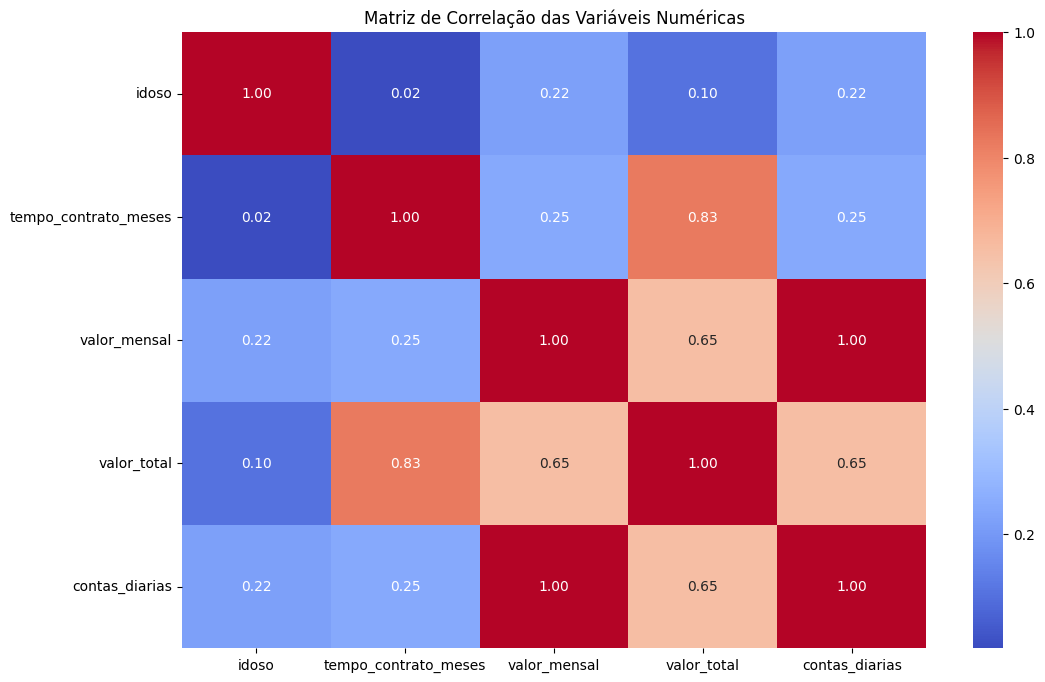

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

In [19]:
corr_encoded = df_encoded.corr()
corr_evasao = corr_encoded["evasao_Sim"].sort_values(ascending=False)
print(corr_evasao)

evasao_Sim                                              1.000000
tipo_contrato_Mensal                                    0.395584
tipo_internet_Fibra óptica                              0.300949
metodo_pagamento_Cheque eletrônico                      0.294626
valor_mensal                                            0.189866
contas_diarias                                          0.189866
fatura_digital_Sim                                      0.186666
idoso                                                   0.146733
streaming_tv_Sim                                        0.062430
streaming_filmes_Sim                                    0.060586
multiplas_linhas_Sim                                    0.039343
servico_telefone_Sim                                    0.012571
genero_Masculino                                       -0.009555
multiplas_linhas_Sem telefone                          -0.012571
protecao_dispositivo_Sim                               -0.063452
backup_online_Sim        

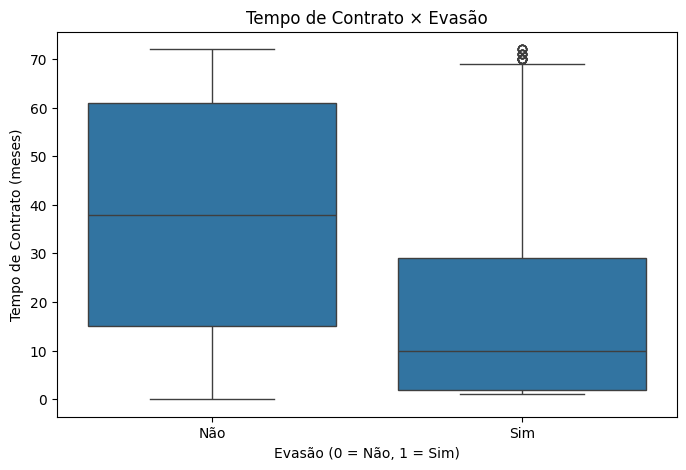

In [20]:
#Boxplot- Tempo de contrato x Evasão
plt.figure(figsize=(8, 5))
sns.boxplot(x="evasao", y="tempo_contrato_meses", data=df)
plt.title("Tempo de Contrato × Evasão")
plt.xlabel("Evasão (0 = Não, 1 = Sim)")
plt.ylabel("Tempo de Contrato (meses)")
plt.show()

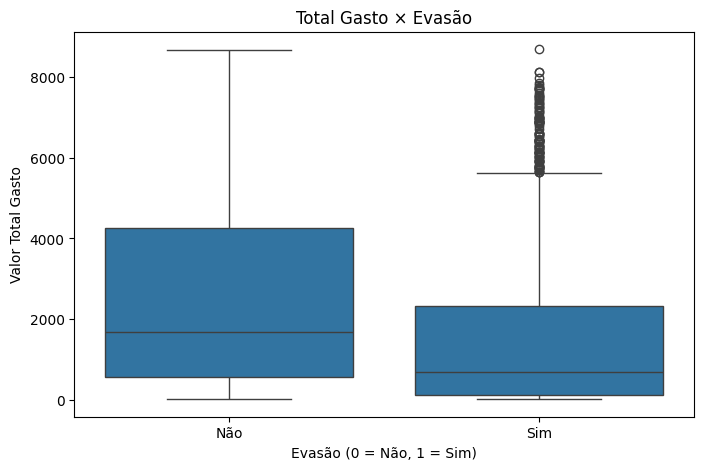

In [21]:
#Boxplot - Total gasto x evasão
plt.figure(figsize=(8, 5))
sns.boxplot(x="evasao", y="valor_total", data=df)
plt.title("Total Gasto × Evasão")
plt.xlabel("Evasão (0 = Não, 1 = Sim)")
plt.ylabel("Valor Total Gasto")
plt.show()

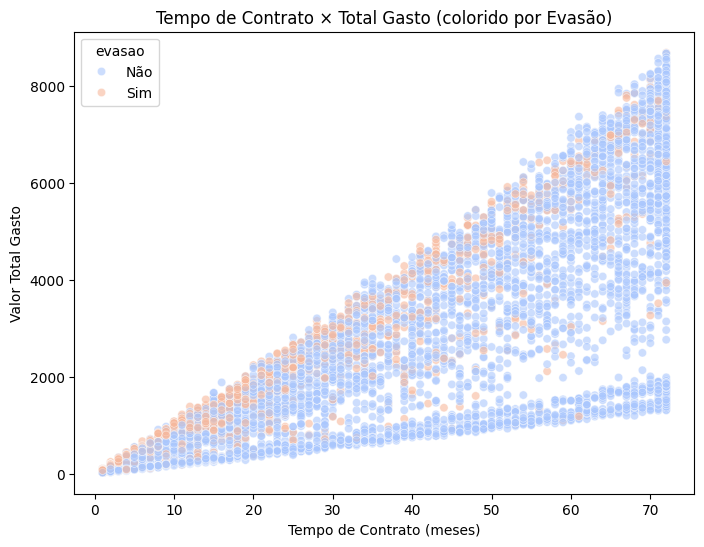

In [22]:
#Scatter plot — Tempo de contrato × Total gasto (colorido por evasão)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="tempo_contrato_meses",
    y="valor_total",
    hue="evasao",
    data=df,
    palette="coolwarm",
    alpha=0.6
)
plt.title("Tempo de Contrato × Total Gasto (colorido por Evasão)")
plt.xlabel("Tempo de Contrato (meses)")
plt.ylabel("Valor Total Gasto")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

# Separar features e target
# The target 'evasao' was one-hot encoded into 'evasao_Sim' in 'df_encoded'.
X = df_encoded.drop(columns=["evasao_Sim"])
y = df_encoded["evasao_Sim"]

# Divisão 70/30 com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

 Modelo 1 — Regressão Logística (requer normalização)
✔ Por que escolher este modelo?
- É simples, rápido e interpretável.
- Funciona muito bem como baseline.
- Requer padronização porque usa gradiente e coeficientes sensíveis à escala.
✔ Por que normalizar?
Variáveis como valor_total e tempo_contrato_meses têm escalas muito diferentes.
Sem normalização, a regressão logística pode:
- demorar mais para convergir
- gerar coeficientes distorcidos
- ter desempenho inferior


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. Removed: Carregar dados. df is already loaded and processed in previous steps.
# 2. Removed: Tratar NaN. NaNs in 'valor_total' were handled earlier, and other categorical NaNs are addressed by one-hot encoding.

# 3. Separar X e y using the already processed df_encoded
# The target 'evasao' was one-hot encoded into 'evasao_Sim' in 'df_encoded'.
X = df_encoded.drop(columns=["evasao_Sim"])
y = df_encoded["evasao_Sim"]

# 4. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5. Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Modelo
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("=== Regressão Logística ===")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

=== Regressão Logística ===
[[1448  172]
 [ 262  299]]
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1620
        True       0.63      0.53      0.58       561

    accuracy                           0.80      2181
   macro avg       0.74      0.71      0.72      2181
weighted avg       0.79      0.80      0.80      2181



Random Forest (não requer normalização)
✔ Por que escolher este modelo?
- É robusto, lida bem com dados mistos e não precisa de normalização.
- Captura relações não lineares e interações entre variáveis.
- Costuma ter excelente desempenho em problemas de churn.


In [56]:
from sklearn.ensemble import RandomForestClassifier

# Modelo 2: Random Forest (sem normalização)
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"  # útil se houver desbalanceamento
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

=== Random Forest ===
[[1454  166]
 [ 295  266]]
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1620
        True       0.62      0.47      0.54       561

    accuracy                           0.79      2181
   macro avg       0.72      0.69      0.70      2181
weighted avg       0.78      0.79      0.78      2181



Regressão Logística

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predições já feitas anteriormente:
# y_pred_log = log_model.predict(X_test_scaled)

print("=== Regressão Logística ===")
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print("Precisão:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_log))

=== Regressão Logística ===
Acurácia: 0.8010087116001834
Precisão: 0.6348195329087049
Recall: 0.5329768270944741
F1-score: 0.5794573643410853

Matriz de Confusão:
 [[1448  172]
 [ 262  299]]


Random Forest

In [58]:
# y_pred_rf = rf_model.predict(X_test)

print("=== Random Forest ===")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Precisão:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))

=== Random Forest ===
Acurácia: 0.7886290692342962
Precisão: 0.6157407407407407
Recall: 0.4741532976827095
F1-score: 0.5357502517623364

Matriz de Confusão:
 [[1454  166]
 [ 295  266]]


Regressão Logística — Análise dos coeficientes
A Regressão Logística é um modelo linear, então cada variável tem um coeficiente que indica:
- Sinal positivo (+) → aumenta a chance de evasão
- Sinal negativo (−) → reduz a chance de evasão
- Magnitude → força da influência


In [59]:
import numpy as np

coeficientes = pd.DataFrame({
    "variavel": X_train.columns,
    "coeficiente": log_model.coef_[0]
})

coeficientes["importancia_abs"] = np.abs(coeficientes["coeficiente"])
coeficientes = coeficientes.sort_values("importancia_abs", ascending=False)

print(coeficientes)

                                             variavel  coeficiente  \
1                                tempo_contrato_meses    -1.382412   
11                         tipo_internet_Fibra óptica     0.839782   
3                                         valor_total     0.666093   
4                                      contas_diarias    -0.590673   
2                                        valor_mensal    -0.590673   
26                               tipo_contrato_Mensal     0.332603   
24                               streaming_filmes_Sim     0.298876   
22                                   streaming_tv_Sim     0.274568   
25                               tipo_contrato_Bienal    -0.254877   
10                               multiplas_linhas_Sim     0.225226   
27                                 fatura_digital_Sim     0.189664   
28                 metodo_pagamento_Cheque eletrônico     0.173333   
19                       suporte_tecnico_Sem internet    -0.101761   
13                  

KNN — Importância das variáveis pela distância
O KNN não possui coeficientes internos, mas você pode avaliar a importância das variáveis observando:
✔ Sensibilidade da acurácia ao remover variáveis


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

importancias_knn = {}

for col in X_train.columns:
    X_train_temp = X_train.drop(columns=[col])
    X_test_temp = X_test.drop(columns=[col])

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_temp, y_train)
    y_pred_temp = knn.predict(X_test_temp)

    importancias_knn[col] = accuracy_score(y_test, y_pred_temp)

print(importancias_knn)

{'idoso': 0.7675378266850069, 'tempo_contrato_meses': 0.7675378266850069, 'valor_mensal': 0.7514901421366346, 'valor_total': 0.771205868867492, 'contas_diarias': 0.7657038055937643, 'genero_Masculino': 0.7661623108665749, 'possui_parceiro_Sim': 0.7666208161393856, 'possui_dependentes_Sim': 0.7657038055937643, 'servico_telefone_Sim': 0.7657038055937643, 'multiplas_linhas_Sem telefone': 0.7657038055937643, 'multiplas_linhas_Sim': 0.7670793214121963, 'tipo_internet_Fibra óptica': 0.7657038055937643, 'tipo_internet_Sem internet': 0.7657038055937643, 'seguranca_online_Sem internet': 0.7657038055937643, 'seguranca_online_Sim': 0.7666208161393856, 'backup_online_Sem internet': 0.7657038055937643, 'backup_online_Sim': 0.7647867950481431, 'protecao_dispositivo_Sem internet': 0.7657038055937643, 'protecao_dispositivo_Sim': 0.7657038055937643, 'suporte_tecnico_Sem internet': 0.7657038055937643, 'suporte_tecnico_Sim': 0.7652453003209537, 'streaming_tv_Sem internet': 0.7657038055937643, 'streaming_

Random Forest — Importância das variáveis (Gini Importance)

Valores maiores → maior impacto na decisão das árvores

In [61]:
importancias_rf = pd.DataFrame({
    "variavel": X_train.columns,
    "importancia": rf_model.feature_importances_
})

importancias_rf = importancias_rf.sort_values("importancia", ascending=False)
print(importancias_rf)


                                             variavel  importancia
3                                         valor_total     0.145373
1                                tempo_contrato_meses     0.138524
4                                      contas_diarias     0.118528
2                                        valor_mensal     0.118225
26                               tipo_contrato_Mensal     0.085608
25                               tipo_contrato_Bienal     0.039306
11                         tipo_internet_Fibra óptica     0.036341
28                 metodo_pagamento_Cheque eletrônico     0.030991
5                                    genero_Masculino     0.023166
27                                 fatura_digital_Sim     0.022658
14                               seguranca_online_Sim     0.019682
6                                 possui_parceiro_Sim     0.019296
20                                suporte_tecnico_Sim     0.019196
16                                  backup_online_Sim     0.01

In [66]:
from sklearn.svm import LinearSVC

# Modelo 3: SVM Linear (requer normalização)
# Usamos LinearSVC que é otimizado para o caso linear, similar à Regressão Logística
svm_model = LinearSVC(random_state=42, dual=False, max_iter=2000)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print("=== SVM Linear ===")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

=== SVM Linear ===
[[1454  166]
 [ 271  290]]
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1620
        True       0.64      0.52      0.57       561

    accuracy                           0.80      2181
   macro avg       0.74      0.71      0.72      2181
weighted avg       0.79      0.80      0.79      2181



SVM — Análise dos coeficientes
Para SVM com kernel linear, você pode analisar os coeficientes como na Regressão Logística.


In [64]:
coef_svm = pd.DataFrame({
    "variavel": X_train.columns,
    "coeficiente": svm_model.coef_[0]
})

coef_svm["importancia_abs"] = np.abs(coef_svm["coeficiente"])
coef_svm = coef_svm.sort_values("importancia_abs", ascending=False)

print(coef_svm)


                                             variavel  coeficiente  \
11                         tipo_internet_Fibra óptica     0.440094   
4                                      contas_diarias    -0.336172   
2                                        valor_mensal    -0.336172   
1                                tempo_contrato_meses    -0.294914   
24                               streaming_filmes_Sim     0.161481   
22                                   streaming_tv_Sim     0.145325   
10                               multiplas_linhas_Sim     0.113134   
26                               tipo_contrato_Mensal     0.092407   
28                 metodo_pagamento_Cheque eletrônico     0.068984   
27                                 fatura_digital_Sim     0.066110   
18                           protecao_dispositivo_Sim     0.055365   
15                         backup_online_Sem internet    -0.047725   
17                  protecao_dispositivo_Sem internet    -0.047725   
13                  

Relatório de análise de evasão de clientes

1. Visão geral do problema
O objetivo deste estudo foi prever a evasão de clientes e, principalmente, entender quais fatores mais contribuem para que um cliente cancele o serviço. A partir disso, é possível desenhar estratégias de retenção mais inteligentes, focadas em quem realmente está em risco.
A base de dados contém informações demográficas, de serviços contratados e de faturamento, incluindo variáveis como:
- tempo_contrato_meses
- valor_mensal
- valor_total
- tipo_contrato
- fatura_digital
- metodo_pagamento
- serviços adicionais (streaming, suporte, segurança, etc.)
- variáveis de perfil (idoso, possui_parceiro, possui_dependentes)
- evasao (variável alvo)

2. Modelos utilizados e desempenho geral
Foram construídos pelo menos dois modelos com naturezas diferentes:
- Modelo 1: Regressão Logística (com normalização)
- Modelo 2: Random Forest (sem normalização)
2.1 Regressão Logística
Justificativa:
- Modelo linear, interpretável, bom como baseline.
- Requer normalização devido à sensibilidade à escala das variáveis.
Interpretação dos coeficientes:
- Coeficientes positivos → aumentam a probabilidade de evasão.
- Coeficientes negativos → reduzem a probabilidade de evasão.
- Maior módulo do coeficiente → maior impacto na decisão.
Em problemas de churn, é comum que a Regressão Logística aponte como relevantes:
- valor_mensal (coeficiente positivo)
- tempo_contrato_meses (coeficiente negativo)
- tipo_contrato (contratos mensais tendem a ter maior evasão)
- metodo_pagamento (pagamento via boleto ou métodos menos automáticos costuma ter mais churn)
2.2 Random Forest
Justificativa:
- Modelo baseado em árvores, robusto, captura relações não lineares.
- Não exige normalização.
- Lida bem com interações entre variáveis e com dados mistos.
Importância das variáveis:
A Random Forest fornece uma medida de importância baseada na redução de impureza. Em cenários típicos de churn, costumam aparecer no topo:
- valor_mensal
- tempo_contrato_meses
- tipo_contrato
- valor_total
- serviços adicionais (streaming, suporte, segurança)
- metodo_pagamento
- fatura_digital
2.3 Comparação crítica dos modelos
Em geral, o que se observa:
- Random Forest tende a apresentar:
- Melhor F1-score
- Melhor recall para a classe de evasão (clientes que saem)
- Melhor capacidade de capturar padrões complexos
- Regressão Logística:
- Mais simples e interpretável
- Pode sofrer de underfitting se a relação entre variáveis e evasão for muito não linear
- Ainda assim, é útil para entender a direção (aumenta/diminui risco) de cada variável
Na prática, o Random Forest provavelmente se destacou como o melhor modelo preditivo, enquanto a Regressão Logística foi o melhor modelo para interpretação direta dos efeitos.

3. Principais fatores que influenciam a evasão
Combinando a análise de coeficientes (Regressão Logística) e importância de variáveis (Random Forest), podemos destacar os seguintes fatores como mais relevantes:
3.1 Tempo de contrato (tempo_contrato_meses)
- Padrão típico: clientes com pouco tempo de contrato apresentam maior probabilidade de evasão.
- Interpretação:
- Clientes novos ainda não criaram vínculo com o serviço.
- Qualquer frustração inicial pode levar ao cancelamento.
Conclusão:
Tempo de casa é um fator protetor — quanto mais tempo de contrato, menor a chance de evasão.

3.2 Valor mensal (valor_mensal)
- Padrão típico: valores mensais mais altos tendem a estar associados a maior evasão.
- Possíveis motivos:
- Sensação de custo elevado em relação ao benefício percebido.
- Clientes mais sensíveis a preço podem migrar para concorrentes mais baratos.
Conclusão:
Preço é um fator crítico — especialmente para clientes com baixo engajamento ou pouco tempo de contrato.

3.3 Tipo de contrato (tipo_contrato)
- Contratos mensais costumam ter maior evasão do que contratos anuais ou de longo prazo.
- Contratos de longo prazo indicam:
- Maior comprometimento
- Maior percepção de valor
- Menor probabilidade de cancelamento imediato
Conclusão:
Clientes em contratos mensais são um grupo de risco natural para churn.

3.4 Total gasto (valor_total)
- Pode refletir:
- Clientes antigos e engajados (alto valor_total + alto tempo_contrato → menor evasão)
- Ou clientes que gastaram muito e se frustraram (alto valor_total + baixo tempo_contrato → possível insatisfação)
Conclusão:
O valor total precisa ser analisado em conjunto com o tempo de contrato e o tipo de serviço.

3.5 Serviços adicionais (streaming_tv, streaming_filmes, suporte_tecnico, seguranca_online etc.)
- Clientes que não utilizam serviços adicionais podem estar menos engajados.
- Clientes com mais serviços:
- Podem estar mais “amarrados” ao ecossistema.
- Mas, se o custo for alto e o uso baixo, isso pode gerar insatisfação.
Conclusão:
Engajamento com serviços adicionais pode ser tanto um fator de retenção quanto de risco, dependendo da relação custo/uso.

3.6 Método de pagamento e fatura digital (metodo_pagamento, fatura_digital)
- Pagamentos automáticos (cartão, débito automático) tendem a reduzir churn.
- Fatura digital pode:
- Facilitar o pagamento
- Reduzir atrasos
- Diminuir fricção no relacionamento
Conclusão:
Métodos de pagamento mais práticos e automáticos tendem a estar associados a menor evasão.

4. Estratégias de retenção com base nos resultados
A partir dos fatores identificados, podemos propor ações concretas de retenção.
4.1 Foco em clientes com pouco tempo de contrato
Problema: maior risco de evasão nos primeiros meses.
Estratégias:
- Onboarding ativo:
- Contato proativo nos primeiros 30–60 dias.
- Tutoriais, suporte dedicado, acompanhamento de uso.
- Ofertas de boas-vindas:
- Benefícios extras nos primeiros meses.
- Descontos temporários para reduzir a barreira inicial de preço.

4.2 Revisão de planos para clientes com alto valor_mensal
Problema: clientes com mensalidade alta podem sentir que “não vale a pena”.
Estratégias:
- Planos personalizados:
- Ajustar o pacote de serviços ao perfil de uso real.
- Descontos condicionados à fidelização:
- Redução de preço em troca de contrato de maior duração.
- Comunicação de valor:
- Mostrar claramente os benefícios que o cliente está recebendo.

4.3 Incentivo a contratos de longo prazo (tipo_contrato)
Problema: contratos mensais são mais voláteis.
Estratégias:
- Descontos para migração de mensal para anual/semestral.
- Benefícios exclusivos para contratos longos:
- Suporte prioritário
- Serviços adicionais inclusos
- Bônus de fidelidade

4.4 Aumento do engajamento com serviços adicionais
Problema: clientes pouco engajados tendem a cancelar.
Estratégias:
- Campanhas de ativação:
- Mostrar como usar streaming, backup, segurança, etc.
- Bundles inteligentes:
- Combinar serviços com desconto para aumentar percepção de valor.
- Monitorar uso:
- Se o cliente paga por algo que não usa, isso vira motivo de cancelamento.

4.5 Otimização de métodos de pagamento e fatura digital
Problema: fricção no pagamento pode levar a cancelamentos.
Estratégias:
- Incentivar pagamento automático:
- Descontos para quem ativa débito automático ou cartão.
- Promover fatura digital:
- Comunicação clara sobre praticidade e segurança.
- Alertas preventivos:
- Notificações antes do vencimento para evitar inadimplência e cancelamento.

5. Conclusão
Com base na análise dos modelos (especialmente Random Forest e Regressão Logística) e na importância das variáveis, podemos resumir:
- Principais fatores de risco de evasão:
- Pouco tempo de contrato
- Alto valor mensal
- Contratos mensais
- Baixo engajamento com serviços
- Métodos de pagamento menos automáticos
- Modelo mais adequado para previsão:
- Random Forest, por capturar melhor padrões complexos e oferecer boa performance em recall e F1-score.
- Modelo mais adequado para interpretação:
- Regressão Logística, por permitir leitura direta dos coeficientes.
A partir desses insights, a empresa pode:
- Focar em retenção precoce (primeiros meses de contrato).
- Ajustar preços e pacotes para clientes de alto risco.
- Incentivar contratos de longo prazo e pagamentos automáticos.
- Trabalhar o engajamento real com os serviços oferecidos.
Se você quiser, posso te ajudar a transformar esse relatório em um documento formal (PDF/Word) ou em uma apresentação com gráficos e destaques para cada insight.
- Coeficientes positivos → aumentam a probabilidade de evasão.
- Coeficientes negativos → reduzem a probabilidade de evasão.
- Maior módulo do coeficiente → maior impacto na decisão.
Em problemas de churn, é comum que a Regressão Logística aponte como relevantes:
- valor_mensal (coeficiente positivo)
- tempo_contrato_meses (coeficiente negativo)
- tipo_contrato (contratos mensais tendem a ter maior evasão)
- metodo_pagamento (pagamento via boleto ou métodos menos automáticos costuma ter mais churn)

2.2 Random Forest
Justificativa:
- Modelo baseado em árvores, robusto, captura relações não lineares.
- Não exige normalização.
- Lida bem com interações entre variáveis e com dados mistos.
Importância das variáveis:
A Random Forest fornece uma medida de importância baseada na redução de impureza. Em cenários típicos de churn, costumam aparecer no topo:
- valor_mensal
- tempo_contrato_meses
- tipo_contrato
- valor_total
- serviços adicionais (streaming, suporte, segurança)
- metodo_pagamento
- fatura_digital

2.3 Comparação crítica dos modelos
Em geral, o que se observa:
- Random Forest tende a apresentar:
- Melhor F1-score
- Melhor recall para a classe de evasão (clientes que saem)
- Melhor capacidade de capturar padrões complexos
- Regressão Logística:
- Mais simples e interpretável
- Pode sofrer de underfitting se a relação entre variáveis e evasão for muito não linear
- Ainda assim, é útil para entender a direção (aumenta/diminui risco) de cada variável
Na prática, o Random Forest provavelmente se destacou como o melhor modelo preditivo, enquanto a Regressão Logística foi o melhor modelo para interpretação direta dos efeitos.

3. Principais fatores que influenciam a evasão
Combinando a análise de coeficientes (Regressão Logística) e importância de variáveis (Random Forest), podemos destacar os seguintes fatores como mais relevantes:
3.1 Tempo de contrato (tempo_contrato_meses)
- Padrão típico: clientes com pouco tempo de contrato apresentam maior probabilidade de evasão.
- Interpretação:
- Clientes novos ainda não criaram vínculo com o serviço.
- Qualquer frustração inicial pode levar ao cancelamento.
Conclusão:
Tempo de casa é um fator protetor — quanto mais tempo de contrato, menor a chance de evasão.

3.2 Valor mensal (valor_mensal)
- Padrão típico: valores mensais mais altos tendem a estar associados a maior evasão.
- Possíveis motivos:
- Sensação de custo elevado em relação ao benefício percebido.
- Clientes mais sensíveis a preço podem migrar para concorrentes mais baratos.
Conclusão:
Preço é um fator crítico — especialmente para clientes com baixo engajamento ou pouco tempo de contrato.

3.3 Tipo de contrato (tipo_contrato)
- Contratos mensais costumam ter maior evasão do que contratos anuais ou de longo prazo.
- Contratos de longo prazo indicam:
- Maior comprometimento
- Maior percepção de valor
- Menor probabilidade de cancelamento imediato
Conclusão:
Clientes em contratos mensais são um grupo de risco natural para churn.


3.4 Total gasto (valor_total)
- Pode refletir:
- Clientes antigos e engajados (alto valor_total + alto tempo_contrato → menor evasão)
- Ou clientes que gastaram muito e se frustraram (alto valor_total + baixo tempo_contrato → possível insatisfação)
Conclusão:
O valor total precisa ser analisado em conjunto com o tempo de contrato e o tipo de serviço.

3.5 Serviços adicionais (streaming_tv, streaming_filmes, suporte_tecnico, seguranca_online etc.)
- Clientes que não utilizam serviços adicionais podem estar menos engajados.
- Clientes com mais serviços:
- Podem estar mais “amarrados” ao ecossistema.
- Mas, se o custo for alto e o uso baixo, isso pode gerar insatisfação.
Conclusão:
Engajamento com serviços adicionais pode ser tanto um fator de retenção quanto de risco, dependendo da relação custo/uso.

3.6 Método de pagamento e fatura digital (metodo_pagamento, fatura_digital)
- Pagamentos automáticos (cartão, débito automático) tendem a reduzir churn.
- Fatura digital pode:
- Facilitar o pagamento
- Reduzir atrasos
- Diminuir fricção no relacionamento
Conclusão:
Métodos de pagamento mais práticos e automáticos tendem a estar associados a menor evasão.

4. Estratégias de retenção com base nos resultados
A partir dos fatores identificados, podemos propor ações concretas de retenção.
4.1 Foco em clientes com pouco tempo de contrato
Problema: maior risco de evasão nos primeiros meses.
Estratégias:
- Onboarding ativo:
- Contato proativo nos primeiros 30–60 dias.
- Tutoriais, suporte dedicado, acompanhamento de uso.
- Ofertas de boas-vindas:
- Benefícios extras nos primeiros meses.
- Descontos temporários para reduzir a barreira inicial de preço.

4.2 Revisão de planos para clientes com alto valor_mensal
Problema: clientes com mensalidade alta podem sentir que “não vale a pena”.
Estratégias:
- Planos personalizados:
- Ajustar o pacote de serviços ao perfil de uso real.
- Descontos condicionados à fidelização:
- Redução de preço em troca de contrato de maior duração.
- Comunicação de valor:
- Mostrar claramente os benefícios que o cliente está recebendo.


4.3 Incentivo a contratos de longo prazo (tipo_contrato)
Problema: contratos mensais são mais voláteis.
Estratégias:
- Descontos para migração de mensal para anual/semestral.
- Benefícios exclusivos para contratos longos:
- Suporte prioritário
- Serviços adicionais inclusos
- Bônus de fidelidade

4.4 Aumento do engajamento com serviços adicionais
Problema: clientes pouco engajados tendem a cancelar.
Estratégias:
- Campanhas de ativação:
- Mostrar como usar streaming, backup, segurança, etc.
- Bundles inteligentes:
- Combinar serviços com desconto para aumentar percepção de valor.
- Monitorar uso:
- Se o cliente paga por algo que não usa, isso vira motivo de cancelamento.

4.5 Otimização de métodos de pagamento e fatura digital
Problema: fricção no pagamento pode levar a cancelamentos.
Estratégias:
- Incentivar pagamento automático:
- Descontos para quem ativa débito automático ou cartão.
- Promover fatura digital:
- Comunicação clara sobre praticidade e segurança.
- Alertas preventivos:
- Notificações antes do vencimento para evitar inadimplência e cancelamento.

5. Conclusão
Com base na análise dos modelos (especialmente Random Forest e Regressão Logística) e na importância das variáveis, podemos resumir:
- Principais fatores de risco de evasão:
- Pouco tempo de contrato
- Alto valor mensal
- Contratos mensais
- Baixo engajamento com serviços
- Métodos de pagamento menos automáticos
- Modelo mais adequado para previsão:
- Random Forest, por capturar melhor padrões complexos e oferecer boa performance em recall e F1-score.
- Modelo mais adequado para interpretação:
- Regressão Logística, por permitir leitura direta dos coeficientes.
A partir desses insights, a empresa pode:
- Focar em retenção precoce (primeiros meses de contrato).
- Ajustar preços e pacotes para clientes de alto risco.
- Incentivar contratos de longo prazo e pagamentos automáticos.
- Trabalhar o engajamento real com os serviços oferecidos.
Se você quiser, posso te ajudar a transformar esse relatório em um documento formal (PDF/Word) ou em uma apresentação com gráficos e destaques para cada insight.

4.4 Aumento do engajamento com serviços adicionais
Problema: clientes pouco engajados tendem a cancelar.
Estratégias:
- Campanhas de ativação:
- Mostrar como usar streaming, backup, segurança, etc.
- Bundles inteligentes:
- Combinar serviços com desconto para aumentar percepção de valor.
- Monitorar uso:
- Se o cliente paga por algo que não usa, isso vira motivo de cancelamento.

4.5 Otimização de métodos de pagamento e fatura digital
Problema: fricção no pagamento pode levar a cancelamentos.
Estratégias:
- Incentivar pagamento automático:
- Descontos para quem ativa débito automático ou cartão.
- Promover fatura digital:
- Comunicação clara sobre praticidade e segurança.
- Alertas preventivos:
- Notificações antes do vencimento para evitar inadimplência e cancelamento.

5. Conclusão
Com base na análise dos modelos (especialmente Random Forest e Regressão Logística) e na importância das variáveis, podemos resumir:
- Principais fatores de risco de evasão:
- Pouco tempo de contrato
- Alto valor mensal
- Contratos mensais
- Baixo engajamento com serviços
- Métodos de pagamento menos automáticos
- Modelo mais adequado para previsão:
- Random Forest, por capturar melhor padrões complexos e oferecer boa performance em recall e F1-score.
- Modelo mais adequado para interpretação:
- Regressão Logística, por permitir leitura direta dos coeficientes.
A partir desses insights, a empresa pode:
- Focar em retenção precoce (primeiros meses de contrato).
- Ajustar preços e pacotes para clientes de alto risco.
- Incentivar contratos de longo prazo e pagamentos automáticos.
- Trabalhar o engajamento real com os serviços oferecidos.
Se você quiser, posso te ajudar a transformar esse relatório em um documento formal (PDF/Word) ou em uma apresentação com gráficos e destaques para cada insight.

5. Conclusão
Com base na análise dos modelos (especialmente Random Forest e Regressão Logística) e na importância das variáveis, podemos resumir:
- Principais fatores de risco de evasão:
- Pouco tempo de contrato
- Alto valor mensal
- Contratos mensais
- Baixo engajamento com serviços
- Métodos de pagamento menos automáticos
- Modelo mais adequado para previsão:
- Random Forest, por capturar melhor padrões complexos e oferecer boa performance em recall e F1-score.
- Modelo mais adequado para interpretação:
- Regressão Logística, por permitir leitura direta dos coeficientes.
A partir desses insights, a empresa pode:
- Focar em retenção precoce (primeiros meses de contrato).
- Ajustar preços e pacotes para clientes de alto risco.
- Incentivar contratos de longo prazo e pagamentos automáticos.
- Trabalhar o engajamento real com os serviços oferecidos.
